In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/onlinefoods.csv')
data = data.drop(['Unnamed: 12', 'latitude','longitude','Pin code'], axis= 1)
data.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Yes,Positive


In [3]:
# quick look at the data

print(data.shape)
print(data.columns)

(388, 9)
Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Output', 'Feedback'],
      dtype='object')


pada kode program diatas, kita dapat melihat bahwa kita memiliki sedikit informasi terkait data yang digunakan. terdapat jumlah keseluruhan data sebesar 388 dengan memiliki 9 kolom. hal ini dapat memudahkan kita untuk melakukan analisis data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   Marital Status              388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   Output                      388 non-null    object
 8   Feedback                    388 non-null    object
dtypes: int64(2), object(7)
memory usage: 27.4+ KB


In [5]:
data.describe()

,Age,Family size
count,388.000000,388.000000
mean,24.628866,3.280928
std,2.975593,1.351025
min,18.000000,1.000000
25%,23.000000,2.000000
50%,24.000000,3.000000
75%,26.000000,4.000000
max,33.000000,6.000000


## Data Preproses

In [6]:
# data preproses
data.isna().sum() # mengecek nilai null

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
Output                        0
Feedback                      0
dtype: int64

pada data diatas, dilaporkan bahwa data yang digunakan tidak memiliki nilai null

In [7]:
data.duplicated().sum() # mengecek nilai yang duplikat

144

data yang digunakan memiliki data yang bernilai sama sebesar 144. maka dari itu, data yang redundant harus di hapus pada tahap selanjutnya

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

data yang sebelumnya terdapat duplikat kini sudah tidak ada karena telah dibuang.

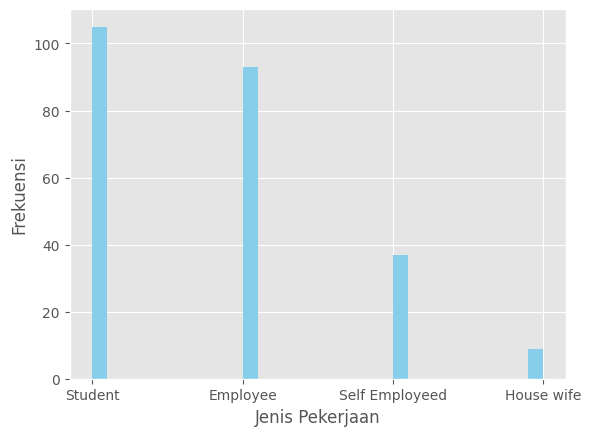

In [9]:
plt.hist(data['Occupation'], bins = 30, color ='skyblue')
plt.xlabel("Jenis Pekerjaan")
plt.ylabel("Frekuensi")
plt.show()

pada analisa awal diatas, terdapat histogram yang menunjukkan tingkat penggunaan layanan online food dari berbagai kalangan pekerjaan. pekerjaan yang sering melakukan transaksi online food yaitu dari kalangan student/ pelajar yang mendominasi dari pekerjaan employee/ karyawan, self employeed dan house wife/ ibu rumah tangga. frekuensi student yang menggunakan layanan online food mencapai lebih dari 100 transaksi.

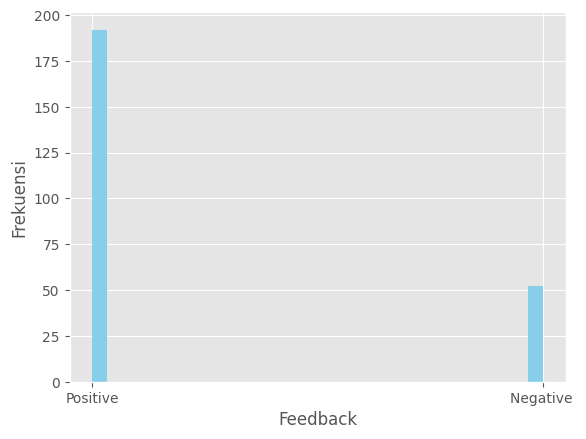

In [12]:
plt.hist(data['Feedback'], bins = 30, color ='skyblue')
plt.xlabel("Feedback")
plt.ylabel("Frekuensi")
plt.show()

pada analisis berikut nya, dapat dilaporkan bahwa penggunaan layanan online food mendapatkan feedback positive yang lebih dominan dibanding feedback negatif. ini menunjukkan bahwa pelayanan online food sangat di percaya oleh masyarakat untuk guna mengadakan makanan cepat saji tanpa perlu memasak di rumah

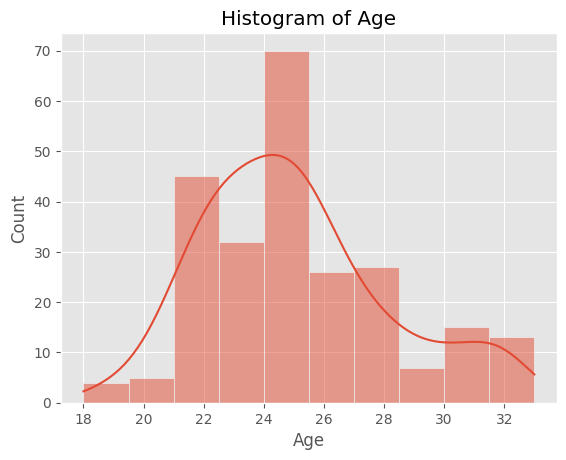

In [14]:
# Visualisasi untuk kolom numerik
sns.histplot(data=data, x='Age', bins=10, kde=True)
plt.title('Histogram of Age')
plt.show()

Histogram diatas menunjukkan bahwa populasi didominasi oleh orang-orang berusia 20-an dan 30-an. Ada juga sejumlah besar orang berusia 40-an dan 50-an. Jumlah orang di setiap kelompok usia lainnya relatif kecil.

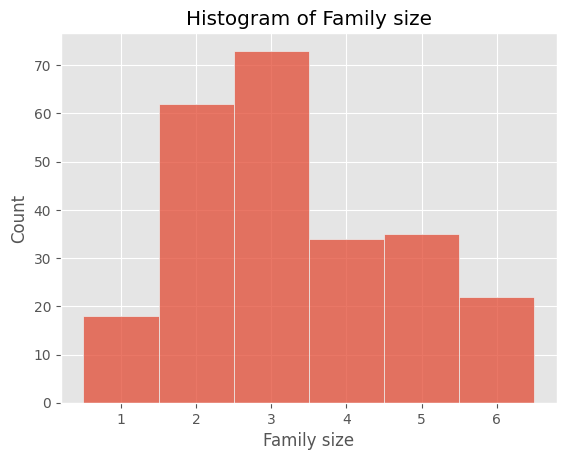

In [15]:
sns.histplot(data=data, x='Family size', bins=range(1, data['Family size'].max() + 1), discrete=True)
plt.title('Histogram of Family size')
plt.show()

Pengamatan berdasarkan histogram diatas

Mayoritas keluarga yang menggunakan layanan online foods(sekitar 60%) memiliki 2 atau 3 anggota.
Jumlah keluarga dengan 1 anggota yang menggunakan layanan online foods (10%) dan 4 anggota (18%) relatif kecil.
Hanya sedikit keluarga yang menggunakan layanan online foods (sekitar 12%) yang memiliki 5 anggota atau lebih.

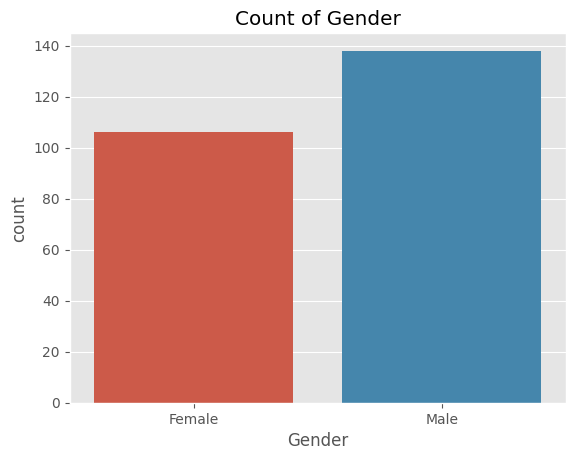

In [17]:
sns.countplot(data=data, x='Gender')
plt.title('Count of Gender')
plt.show()

berdasarkan hasil histogram diatas, laki laki/ male lebih banyak menggunakan layanan online foods di banding kan perempuan/female

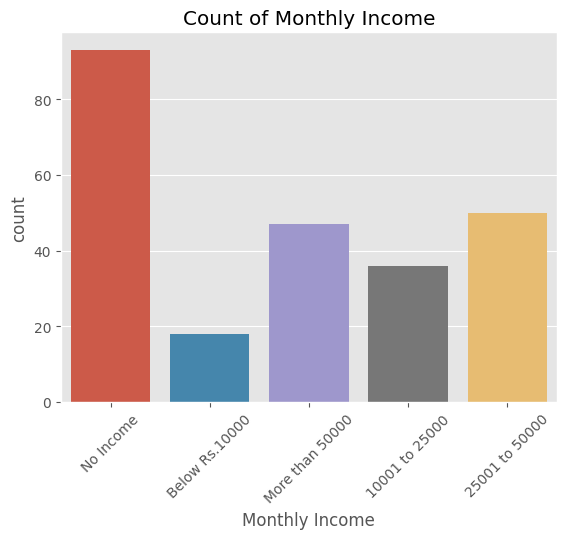

In [19]:
sns.countplot(data=data, x='Monthly Income')
plt.title('Count of Monthly Income')
plt.xticks(rotation=45)
plt.show()

kesimpulan pada histogram di atas yaitu 
Mayoritas orang yang menggunakan layanan online foods(60%) memiliki penghasilan antara Rp 10.001 dan Rp 50.000.
Jumlah orang yang menggunakan layanan online foods dengan penghasilan di bawah Rp 10.000 dan lebih dari Rp 50.000 sama.
Sekitar 20% orang tidak memiliki penghasilan yang menggunakan layanan online foods.

## analisis statistik inferensial

In [23]:
from scipy.stats import ttest_ind, chi2_contingency

# Uji perbedaan umur antara gender
female_age = data[data['Gender'] == 'Female']['Age']
male_age = data[data['Gender'] == 'Male']['Age']

t_stat, p_value = ttest_ind(female_age, male_age)
print("T-test for Age between Female and Male:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Kita menolak hipotesis nol bahwa tidak ada perbedaan umur antara Female dan Male.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")

# Uji perbedaan feedback antara pendapatan bulanan di atas dan di bawah Rs. 10.000
above_10000 = data[data['Monthly Income'] == 'Below Rs.10000']['Feedback']
below_10000 = data[data['Monthly Income'] != 'Below Rs.10000']['Feedback']

above_10000_counts = above_10000.value_counts()
below_10000_counts = below_10000.value_counts()

print("\nFeedback counts for Monthly Income Above Rs. 10,000:")
print(above_10000_counts)
print("\nFeedback counts for Monthly Income Below Rs. 10,000:")
print(below_10000_counts)

chi2, p, _, _ = chi2_contingency([above_10000_counts, below_10000_counts])
print("\nChi-square Test for Feedback between Monthly Income groups:")
print("Chi-square:", chi2)
print("P-value:", p)

if p < alpha:
    print("Kita menolak hipotesis nol bahwa tidak ada hubungan antara Monthly Income dan Feedback.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")


T-test for Age between Female and Male:
T-statistic: -0.1938918225117208
P-value: 0.8464232378314748
Tidak cukup bukti untuk menolak hipotesis nol.

Feedback counts for Monthly Income Above Rs. 10,000:
Positive     11
Negative      7
Name: Feedback, dtype: int64

Feedback counts for Monthly Income Below Rs. 10,000:
Positive     181
Negative      45
Name: Feedback, dtype: int64

Chi-square Test for Feedback between Monthly Income groups:
Chi-square: 2.538230293346444
P-value: 0.11111926892048332
Tidak cukup bukti untuk menolak hipotesis nol.


In [ ]:
pyppeteer-installpip install -U notebook-as-pdf